<a href="https://colab.research.google.com/github/iza-lunguinho/Cartorioebac/blob/main/Exc_Mod_28_Izabella_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: COVID-19 Dashboard
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

---

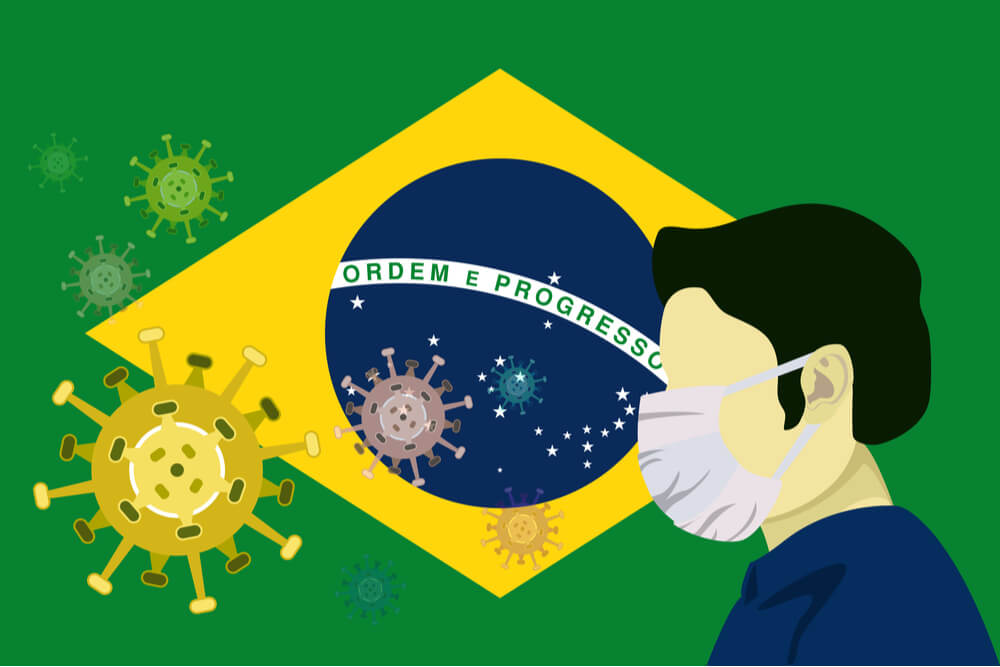

---

# **COVID Dashboard**

# **1. Intrdução**

```

```



### 1.1. TLDR "Too Long; Didn't Read" (**em português, "Muito Longo; Não Li"). [texto do link](https://**)




*   Dashboard:
*   Google Data Studio (link).


*   Processamento:
*   Kaggle Notebook (link).


*  Fontes:

* Casos pela universidade John Hopkins (link);
Vacinação pela universidade de Oxford (link).












## **1.2. Pandemia Coranavírus 2019**

A Covid-19 é uma infecção respiratória aguda causada pelo coronavírus SARS-CoV-2, potencialmente grave, de elevada transmissibilidade e de distribuição global. O SARS-CoV-2 é um betacoronavírus descoberto em amostras de lavado broncoalveolar obtidas de pacientes com pneumonia de causa desconhecida na cidade de Wuhan, província de Hubei, China, em dezembro de 2019. Pertence ao subgênero Sarbecovírus da família Coronaviridae e é o sétimo coronavírus conhecido a infectar seres humanos.([link](https://www.gov.br/saude/pt-br/assuntos/covid-19))

## **1.3. Dados**

Os dados sobre casos da COVID-19 são compilados pelo centro de ciência de sistemas e engenharia da universidade americana John Hopkins. Os dados são atualizados diariamente desde janeiro de 2020 com uma granularidade temporal de dias e geográfica de regiões de países (estados, condados, etc.). Abaixo estão descritos os dados derivados do seu processamento.



*   **data:** data de referência;

* **estado:** estado;

*   **país:** país;

*   **população:** população estimada;

*   **infectados:** número acumulado de infectados;
*   **infectados_diario:** número diário de infectados;


*   **media_movel_infectados_7d:** média móvel de 7 dias do número diário de infectados;


*   **taxa_media_movel_infectados_7d_14d:** média móvel de 7 dias dividido pela média móvel de 7 dias de 14 dias atrás;


*   **mortos:**  número acumulado de mortos;


*   **mortos_diario:** número diário de mortos;


*   **media_movel_mortos_7d:** média móvel de 7 dias do número diário de mortos;

*   **taxa_media_movel_mortos_7d_14d:** média móvel de 7 dias dividido pela média móvel de 7 dias de 14 dias atrás;
*   **mês:**  mês de referência;


*   **ano:** ano de referência.
                  






  Os dados sobre vacinação da COVID-19 são compilados pelo projeto Nosso Mundo em Dados (Our World in Data ou OWID) da universidade britânica de Oxford . Os dados são atualizados diariamente deste janeiro de 2020 com uma granularidade temporal de dias e geográfica de países. O website do projeto pode ser acessado neste enquanto os dados, neste . Abaixo estão descritos os dados derivados do seu processamento.




*   **data:** data de referência;

*   **país:** país;

*   **população:** população estimada;

*   **total:** total de doses administradas;
*   **dose_unica:** pessoas com uma dose;


*   **percentual_dose_unica:** porcentagem de pessoas com uma dose;


*   **duas_doses:** pessoas com duas doses;


*   **percentual_duas_doses:** porcentagem de pessoas com duas doses;


*   **tres_doses:** pessoas com três doses;
*   **percentual_tres_doses:** porcentagem de pessoas com três doses;


*   **mês:** mês de referência;
*   **ano:**  ano de referência.





## 2\. **Análise Exploratória de Dados**

Nesta sessão vamos utilizar os seguintes pacotes Python para processar os dados bruto em um formato adequado para um painel para exploração interativa de dados.

In [1]:
import math
from typing import Iterator
from datetime import datetime, timedelta

import numpy as np
import pandas as pd

# **2.1 Casos**

Vamos processar os dados de casos da universidade John Hopkins.

2.1.1 Extração



O dado está compilado em um arquivo por dia, exemplo para 2021/12/01.

In [2]:
cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-12-2021.csv', sep=',')

In [3]:
cases.head(2)

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-13 05:22:15,33.93911,67.709953,53584,2301,44608,6675,Afghanistan,137.647787,4.294192
1,NaN,NaN,NaN,Albania,2021-01-13 05:22:15,41.15330,20.168300,64627,1252,38421,24954,Albania,2245.708527,1.937271


In [4]:
def date_range(start_date: datetime, end_date: datetime) -> Iterator[datetime]:
    """
    Função geradora que produz um iterador com todas as datas entre duas datas fornecidas.

    Args:
        start_date (datetime): A data de início (inclusive).
        end_date (datetime): A data de fim (não inclusive).

    Yields:
        datetime: Uma data dentro do intervalo especificado.
    """

    # Calcula o número de dias entre as datas de início e fim.
    date_range_days: int = (end_date - start_date).days

    # Itera sobre cada dia dentro do intervalo.
    for lag in range(date_range_days):
        # Calcula a próxima data somando o deslocamento `lag` (em dias) à data de início.
        yield start_date + timedelta(lag)

In [5]:
start_date = datetime(2021,  1,  1)
end_date   = datetime(2021, 12, 31)

In [9]:
# Define uma variável para armazenar os casos, inicialmente vazia.
cases = None

# Flag para indicar se o DataFrame `cases` está vazio.
cases_is_empty = True

# Itera sobre um intervalo de datas, possivelmente definidas pelas variáveis `start_date` e `end_date`.
for date in date_range(start_date=start_date, end_date=end_date):

    # Formata a data no formato mês-dia-ano (ex: 06-22-2024).
    date_str = date.strftime('%m-%d-%Y')

    # Constrói a URL para acessar o arquivo CSV com os dados diários de COVID-19 da Johns Hopkins University.
    data_source_url = f'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-17-2022.csv'

    # Lê o arquivo CSV da URL em um DataFrame do Pandas.
    case = pd.read_csv(data_source_url, sep=',')

    # Remove colunas que não serão utilizadas na análise:
    #   - FIPS
    #   - Admin2
    #   - Last_Update
    #   - Lat
    #   - Long_
    #   - Recovered
    #   - Active
    #   - Combined_Key
    #   - Case_Fatality_Ratio
    case = case.drop(['FIPS', 'Admin2', 'Last_Update', 'Lat', 'Long_', 'Recovered', 'Active', 'Combined_Key', 'Case_Fatality_Ratio'], axis=1)

    # Filtra apenas os dados do Brasil.
    case = case.query('Country_Region == "Brazil"').reset_index(drop=True)

    # Adiciona uma nova coluna 'Date' com a data formatada como datetime.
    case['Date'] = pd.to_datetime(date.strftime('%Y-%m-%d'))

    # Se o DataFrame `cases` estiver vazio (primeira iteração):
    if cases_is_empty:
        # Atribui o DataFrame `case` (com os dados do primeiro dia) a `cases`.
        cases = case
        # Define a flag `cases_is_empty` como False, pois `cases` não está mais vazio.
        cases_is_empty = False
    # Se o DataFrame `cases` já tiver dados (iterações seguintes):
    else:
        # Concatena o DataFrame `case` (com os dados do dia atual) ao DataFrame `cases`.
        cases = pd.concat([cases, case], ignore_index=True)


In [7]:
cases['Date'].unique()

<DatetimeArray>
['2021-01-01 00:00:00', '2021-01-02 00:00:00', '2021-01-03 00:00:00',
 '2021-01-04 00:00:00', '2021-01-05 00:00:00', '2021-01-06 00:00:00',
 '2021-01-07 00:00:00', '2021-01-08 00:00:00', '2021-01-09 00:00:00',
 '2021-01-10 00:00:00',
 ...
 '2021-12-21 00:00:00', '2021-12-22 00:00:00', '2021-12-23 00:00:00',
 '2021-12-24 00:00:00', '2021-12-25 00:00:00', '2021-12-26 00:00:00',
 '2021-12-27 00:00:00', '2021-12-28 00:00:00', '2021-12-29 00:00:00',
 '2021-12-30 00:00:00']
Length: 364, dtype: datetime64[ns]

In [8]:
cases.query('Province_State == "Sao Paulo"').head()

,Province_State,Country_Region,Confirmed,Deaths,Incident_Rate,Date
24,Sao Paulo,Brazil,1466191,46775,3192.990778,2021-01-01
51,Sao Paulo,Brazil,1467953,46808,3196.827966,2021-01-02
78,Sao Paulo,Brazil,1471422,46845,3204.382565,2021-01-03
105,Sao Paulo,Brazil,1473670,46888,3209.278136,2021-01-04
132,Sao Paulo,Brazil,1486551,47222,3237.329676,2021-01-05


# **2.1.2 Wrangling**

In [10]:
cases.head(2)

,Province_State,Country_Region,Confirmed,Deaths,Incident_Rate,Date
0,Acre,Brazil,90250,1854,10233.180450,2021-01-01
1,Alagoas,Brazil,246044,6395,7372.420751,2021-01-01


In [11]:
cases.shape

(9828, 6)

In [12]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9828 entries, 0 to 9827
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Province_State  9828 non-null   object        
 1   Country_Region  9828 non-null   object        
 2   Confirmed       9828 non-null   int64         
 3   Deaths          9828 non-null   int64         
 4   Incident_Rate   9828 non-null   float64       
 5   Date            9828 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 460.8+ KB


In [13]:
# Renomeia as colunas 'Province_State' e 'Country_Region' para 'state' e 'country', respectivamente.
cases = cases.rename(
    columns={
        'Province_State': 'state',
        'Country_Region': 'country'
    }
)

# Itera sobre cada coluna no DataFrame 'cases'.
for col in cases.columns:
    # Renomeia a coluna atual para sua versão em letras minúsculas.
    cases = cases.rename(columns={col: col.lower()})

In [14]:
states_map = {
    'Amapa': 'Amapá',
    'Ceara': 'Ceará',
    'Espirito Santo': 'Espírito Santo',
    'Goias': 'Goiás',
    'Para': 'Pará',
    'Paraiba': 'Paraíba',
    'Parana': 'Paraná',
    'Piaui': 'Piauí',
    'Rondonia': 'Rondônia',
    'Sao Paulo': 'São Paulo'
}

cases['state'] = cases['state'].apply(lambda state: states_map.get(state) if state in states_map.keys() else state)

In [15]:
cases['month'] = cases['date'].apply(lambda date: date.strftime('%Y-%m'))
cases['year']  = cases['date'].apply(lambda date: date.strftime('%Y'))

In [16]:
cases['population'] = round(100000 * (cases['confirmed'] / cases['incident_rate']))
cases = cases.drop('incident_rate', axis=1)

In [17]:
# Inicializa variáveis para armazenar o conjunto de dados combinado final
cases_ = None
cases_is_empty = True

# Função para determinar a tendência com base na taxa de mudança
def get_trend(rate: float) -> str:
    """
    Categoriza uma taxa de mudança em 'decrescente', 'crescente' ou 'estável'.

    Args:
        rate: A taxa de mudança.

    Returns:
        A categoria de tendência como uma string.
    """
    if np.isnan(rate):
        return np.NaN
    if rate < 0.75:
        status = 'decrescente'
    elif rate > 1.15:
        status = 'estável'
    else:
        status = 'crescente'
    return status

# Itera sobre os estados únicos no conjunto de dados
for state in cases['state'].drop_duplicates():
    # Filtra os dados para o estado atual
    cases_per_state = cases.query(f'state == "{state}"').reset_index(drop=True)
    cases_per_state = cases_per_state.sort_values(by=['date'])  # Classifica por data

    # Calcula as mudanças diárias e médias móveis para casos confirmados
    cases_per_state['confirmados_1d'] = cases_per_state['confirmed'].diff(periods=1)  # Diferença diária
    cases_per_state['confirmados_media_movel_7d'] = np.ceil(cases_per_state['confirmados_1d'].rolling(window=7).mean())
    cases_per_state['taxa_14d_confirmados_media_movel_7d'] = cases_per_state['confirmados_media_movel_7d'] / cases_per_state['confirmados_media_movel_7d'].shift(periods=14)  # Taxa em 14 dias
    cases_per_state['tendencia_confirmados'] = cases_per_state['taxa_14d_confirmados_media_movel_7d'].apply(get_trend) # Tendência com base na taxa

    # Calcula as mudanças diárias e médias móveis para mortes
    cases_per_state['mortes_1d'] = cases_per_state['deaths'].diff(periods=1)
    cases_per_state['mortes_media_movel_7d'] = np.ceil(cases_per_state['mortes_1d'].rolling(window=7).mean())
    cases_per_state['taxa_14d_mortes_media_movel_7d'] = cases_per_state['mortes_media_movel_7d'] / cases_per_state['mortes_media_movel_7d'].shift(periods=14)
    cases_per_state['tendencia_mortes'] = cases_per_state['taxa_14d_mortes_media_movel_7d'].apply(get_trend)

    # Concatena os dados do estado ao conjunto de dados final
    if cases_is_empty:
        cases_ = cases_per_state
        cases_is_empty = False
    else:
        cases_ = pd.concat([cases_, cases_per_state], ignore_index=True)  # Concatenação eficiente

# Substitui o 'cases' original pelos dados processados e libera memória
cases = cases_
# cases_ = None  # Esta linha já está comentada para preservar o resultado.

In [18]:
cases.columns

Index(['state', 'country', 'confirmed', 'deaths', 'date', 'month', 'year',
       'population', 'confirmados_1d', 'confirmados_media_movel_7d',
       'taxa_14d_confirmados_media_movel_7d', 'tendencia_confirmados',
       'mortes_1d', 'mortes_media_movel_7d', 'taxa_14d_mortes_media_movel_7d',
       'tendencia_mortes'],
      dtype='object')

In [19]:
new_column_names = {
    'state': 'estado',
    'country': 'pais',
    'confirmed': 'confirmados',
    'deaths': 'mortes',
    'date': 'data',
    'month': 'mes',
    'year': 'ano',
    'population': 'populacao',
}

cases = cases.rename(columns=new_column_names)

In [ ]:
cases['populacao'] = cases['populacao'].astype('Int64')
cases['confirmados_1d'] = cases['confirmados_1d'].astype('Int64')
cases['confirmados_media_movel_7d'] = cases['confirmados_media_movel_7d'].astype('Int64')
cases['mortes_1d'] = cases['mortes_1d'].astype('Int64')
cases['mortes_media_movel_7d'] = cases['mortes_media_movel_7d'].astype('Int64')

In [20]:
cases.columns

Index(['estado', 'pais', 'confirmados', 'mortes', 'data', 'mes', 'ano',
       'populacao', 'confirmados_1d', 'confirmados_media_movel_7d',
       'taxa_14d_confirmados_media_movel_7d', 'tendencia_confirmados',
       'mortes_1d', 'mortes_media_movel_7d', 'taxa_14d_mortes_media_movel_7d',
       'tendencia_mortes'],
      dtype='object')

In [21]:
cases = cases [['data', 'pais', 'estado', 'populacao', 'confirmados', 'confirmados_1d', 'confirmados_media_movel_7d', 'taxa_14d_confirmados_media_movel_7d', 'tendencia_confirmados', 'mortes', 'mortes_1d', 'mortes_media_movel_7d', 'taxa_14d_mortes_media_movel_7d', 'tendencia_mortes', 'mes', 'ano']]

In [22]:
cases.head(25)

,data,pais,estado,populacao,confirmados,confirmados_1d,confirmados_media_movel_7d,taxa_14d_confirmados_media_movel_7d,tendencia_confirmados,mortes,mortes_1d,mortes_media_movel_7d,taxa_14d_mortes_media_movel_7d,tendencia_mortes,mes,ano
0,2021-01-01,Brazil,Acre,881935.0,90250,NaN,NaN,NaN,NaN,1854,NaN,NaN,NaN,NaN,2021-01,2021
1,2021-01-02,Brazil,Acre,881935.0,90250,0.0,NaN,NaN,NaN,1854,0.0,NaN,NaN,NaN,2021-01,2021
2,2021-01-03,Brazil,Acre,881935.0,90250,0.0,NaN,NaN,NaN,1854,0.0,NaN,NaN,NaN,2021-01,2021
3,2021-01-04,Brazil,Acre,881935.0,90250,0.0,NaN,NaN,NaN,1854,0.0,NaN,NaN,NaN,2021-01,2021
4,2021-01-05,Brazil,Acre,881935.0,90250,0.0,NaN,NaN,NaN,1854,0.0,NaN,NaN,NaN,2021-01,2021
5,2021-01-06,Brazil,Acre,881935.0,90250,0.0,NaN,NaN,NaN,1854,0.0,NaN,NaN,NaN,2021-01,2021
6,2021-01-07,Brazil,Acre,881935.0,90250,0.0,NaN,NaN,NaN,1854,0.0,NaN,NaN,NaN,2021-01,2021
7,2021-01-08,Brazil,Acre,881935.0,90250,0.0,0.0,NaN,NaN,1854,0.0,0.0,NaN,NaN,2021-01,2021
8,2021-01-09,Brazil,Acre,881935.0,90250,0.0,0.0,NaN,NaN,1854,0.0,0.0,NaN,NaN,2021-01,2021
9,2021-01-10,Brazil,Acre,881935.0,90250,0.0,0.0,NaN,NaN,1854,0.0,0.0,NaN,NaN,2021-01,2021


## **2.1.3 Carregamento**

In [23]:
cases.to_csv('./covid-cases.csv', sep=',', index=False)

## **2.2. Vacinação**

## 2.2.1 **Extração**

In [24]:
vaccines = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', sep=',', parse_dates=[3], infer_datetime_format=True)

<ipython-input-24-608e6d2dd56d>:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  vaccines = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv', sep=',', parse_dates=[3], infer_datetime_format=True)


In [25]:
vaccines.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [26]:
vaccines = vaccines.query('location == "Brazil"').reset_index(drop=True)
vaccines = vaccines[['location', 'population', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'date']]

In [27]:
vaccines.head(2)

,location,population,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,date
0,Brazil,215313504.0,NaN,NaN,NaN,NaN,2020-01-05
1,Brazil,215313504.0,NaN,NaN,NaN,NaN,2020-01-06


## **2.2.2. Wrangling**

In [28]:
vaccines.head()

,location,population,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,date
0,Brazil,215313504.0,NaN,NaN,NaN,NaN,2020-01-05
1,Brazil,215313504.0,NaN,NaN,NaN,NaN,2020-01-06
2,Brazil,215313504.0,NaN,NaN,NaN,NaN,2020-01-07
3,Brazil,215313504.0,NaN,NaN,NaN,NaN,2020-01-08
4,Brazil,215313504.0,NaN,NaN,NaN,NaN,2020-01-09


In [29]:
vaccines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   location                 1646 non-null   object        
 1   population               1646 non-null   float64       
 2   total_vaccinations       695 non-null    float64       
 3   people_vaccinated        691 non-null    float64       
 4   people_fully_vaccinated  675 non-null    float64       
 5   total_boosters           455 non-null    float64       
 6   date                     1646 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 90.1+ KB


In [30]:
vaccines = vaccines.fillna(method='ffill')

In [31]:
vaccines = vaccines[(vaccines['date'] >= '2021-01-01') & (vaccines['date'] <= '2021-12-31')].reset_index(drop=True)

In [32]:
vaccines = vaccines.rename(
  columns={
    'location': 'pais',
    'population': 'populacao',
    'total_vaccinations': 'total',
    'people_vaccinated': 'dose_unica',
    'people_fully_vaccinated': 'duas_doses',
    'total_boosters': 'tres_doses',
  }
)



*   Chaves temporais



In [33]:
vaccines['month'] = vaccines['date'].apply(lambda date: date.strftime('%Y-%m'))
vaccines['year']  = vaccines['date'].apply(lambda date: date.strftime('%Y'))




*   Dados relativos:



In [34]:
vaccines['percentual_dose_unica'] = round(vaccines['dose_unica'] / vaccines['populacao'], 4)
vaccines['percentual_duas_doses'] = round(vaccines['duas_doses'] / vaccines['populacao'], 4)
vaccines['percentual_tres_doses'] = round(vaccines['tres_doses'] / vaccines['populacao'], 4)

Garantir o tipo do dado é fundamental para consistência da base de dados. Vamos fazer o type casting das colunas.

In [35]:

vaccines['populacao'] = vaccines['populacao'].astype('Int64')
vaccines['total'] = vaccines['total'].astype('Int64')
vaccines['dose_unica'] = vaccines['dose_unica'].astype('Int64')
vaccines['duas_doses'] = vaccines['duas_doses'].astype('Int64')
vaccines['tres_doses'] = vaccines['tres_doses'].astype('Int64')

In [36]:
vaccines.columns

Index(['pais', 'populacao', 'total', 'dose_unica', 'duas_doses', 'tres_doses',
       'date', 'month', 'year', 'percentual_dose_unica',
       'percentual_duas_doses', 'percentual_tres_doses'],
      dtype='object')

In [37]:
novas_colunas = {
    'date': 'data',
    'country': 'pais',
    'month': 'mes',
    'year': 'ano'
}


In [38]:
vaccines = vaccines.rename(columns=novas_colunas)

In [39]:
vaccines = vaccines[ ['data', 'pais', 'populacao', 'total', 'dose_unica', 'percentual_dose_unica', 'duas_doses', 'percentual_duas_doses', 'tres_doses', 'percentual_tres_doses', 'mes', 'ano']]


## **2.2.3. Carregamento**

In [40]:
vaccines.to_csv('./covid-vaccines.csv', sep=',', index=False)

# **3. Exploração Interativa de Dados**

# **3.1. KPIs**

O dashboard de dados contem os seguintes indicadores chaves de desempenho (key performance indicator ou KPI) consolidados:



1.   Casos e mortes nas 24 horas;
2.   Média móvel (7 dias) de casos e mortes;
3.   Tendência de casos e mortes;
4.   Proporção de vacinados com 1ª, 2ª e 3ª doses.









# **3.2. EDA**

O dashboard de dados contem os seguintes gráficos para a análise exploratória de dados (exploratory data analysis ou EDA) interativa:



1.   Distribuição do números de casos e mortes ao longo do tempo;
2.   Distribuição da média móvel (7 dias) do números de casos e mortes ao longo do tempo;
3.  Distribuição geográfica dos casos por estado por dia.

